# Individualized synthetic data

let $x_{i,t}$ be the $i^{th}$ patient at time $t$. We want the labeling function to depend on the history of events. **We also assume the progression of a disease for a particular patient can be inferred from patient history**.

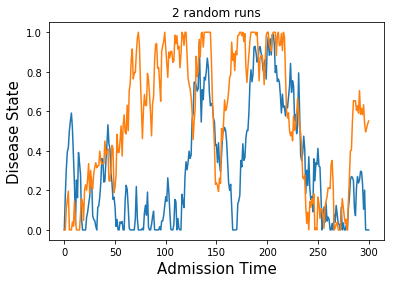

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

def random_walk(T=30, s0=0, vmin=0, vmax=1, step=0.1, 
                random_function=lambda: np.random.randn()):
    path = [s0]
    for t in range(T):
        s = path[-1]
        ns = s + random_function() * step
        path.append(max(min(vmax, ns), 0))
    
    return path

nruns = 2
for _ in range(nruns):
    path = random_walk(T=300)
    plt.plot(path)
    
plt.title('{} random runs'.format(nruns))
plt.xlabel('Admission Time', fontsize=15)
plt.ylabel('Disease State', fontsize=15) # need a specific example of the change of risk factors
plt.show()

In certain realworld diseases, disease state is not reversable, so our synthetic data could be simplified as 

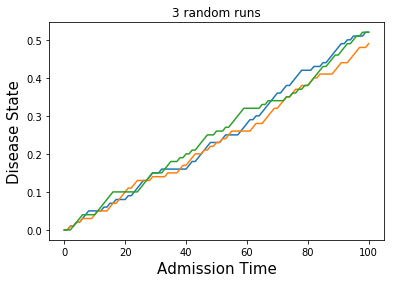

In [3]:
nruns = 3
for _ in range(nruns):
    path = random_walk(T=100, random_function=lambda: np.random.choice([0,0.1]))
    plt.plot(path)
    
plt.title('{} random runs'.format(nruns))
plt.xlabel('Admission Time', fontsize=15)
plt.ylabel('Disease State', fontsize=15) # need a specific example of the change of risk factors
plt.show()

Once we have the disease progression plot, we use the progression to index into a model to use.

We assume the problem is a quadratic and depends on two sets of weights $(w_{attn}, w_{feature})$, where $w_{attn}$ defines attention over past input and $w_{feature}$ defines feature importance. 

For each disease state $s$, the attention and feature importance vector is changing, but we assume the change is smooth with respect to $s$. The following plot gives an illustration of the relationship between $w$ and $s$.

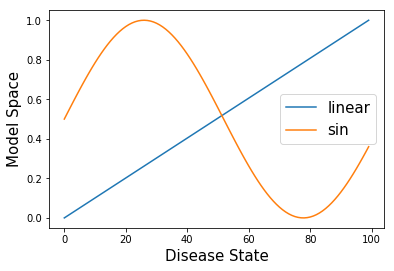

In [4]:
def model_vs_state(f=lambda x: x):
    s = np.linspace(0, 1)
    
s = np.linspace(0, 1, 100)
plt.plot(s, label='linear')
plt.plot(np.sin(s*6)/2 + 1/2, label='sin')

plt.legend(fontsize=15)
plt.ylabel('Model Space', fontsize=15)
plt.xlabel('Disease State', fontsize=15)
plt.show()

The state to model weight mapping maybe complicated, but let's assume is just a simple linear relationship